In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP
import HDF5

In [2]:
include("../model-41/likelihood.jl")
include("../model-41/utill_model.jl")
include("../utill.jl")

plot_projections (generic function with 1 method)

In [3]:
function hist_2d(smpls, dim_1, dim_2; nbins=40, axmin = true, axmax=true)
    smpl_tmp, smpl_w = flatview(unshaped.(smpls.v)), smpls.weight
    if axmin == true
        hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), nbins=nbins)
    else
       hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), (range(axmin[1], stop=axmax[1], length=nbins), range(axmin[2], stop=axmax[2], length=nbins))) 
    end
    hist_tmp = normalize(hist_tmp, mode=:pdf) 
    return hist_tmp
end

hist_2d (generic function with 1 method)

In [4]:
β1 = 0.015
β2 = 0.0077 # (0.8/30/sqrt(12))
β3 = 0.0058 # (0.8/40/sqrt(12))

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.03, 0.19), truncated(Normal(0.2, 0.04), 0.03, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 1.0, 8.0), truncated(Normal(4.0, 2.0), 1.0, 8.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.35 .. 1.0, 
        waist = [truncated(Normal(2.774, 0.03), 2.5, 3.6)],
        waist_2 = [truncated(Normal(2.774, 0.03), 2.5, 3.6)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.47799, 15.025999, 23.1644],
); 

labels = [L"\sigma_x", L"\sigma_y", L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", L"\sigma'_x", L"\sigma'_y", L"\alpha", L"s", L"s",
    L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_y", L"\mu_y", L"\mu_y", L"\mu_y", 
    "ped", "lf", "a", 
    "res x", "res x", "res x", "res y", "res y", "res y", "res x", "res y", 
    "ps x", "ps x", "ps x", "ps y", "ps y", "ps y", "ps x", "ps y", 
    "la", "la", "la"
    ];

In [5]:
FPATH = "../../data/sampling_results/Benchmark-5/"

"../../data/sampling_results/Benchmark-5/"

In [38]:
readdir(FPATH)

8-element Array{String,1}:
 ".ipynb_checkpoints"
 "hc-227.hdf5"
 "hc-296.hdf5"
 "hc-447.hdf5"
 "hc-94.hdf5"
 "lc-192.hdf5"
 "lc-259.hdf5"
 "lc-76.hdf5"

In [56]:
fname = readdir(FPATH)[8]
smpl_tmp = bat_read(FPATH*fname).result
samples = varshape(prior).(smpl_tmp);

In [57]:
fname

# Example HC "hc-2.hdf5"
# Example LC "lc-169.hdf5"

"lc-321.hdf5"

In [58]:
smpl_vect = mode(samples)[1]

(tr_size = [0.06484150591121454, 0.11288704938308154], tr_size_2 = [0.10132789012424696, 0.10881913691639064], ang_spr = [6.544436370772472, 5.98544371381732], ang_spr_2 = [2.32748410663298, 2.261982982318494], mixt_pow = 0.551262313871002, waist = [2.9667402318712806], waist_2 = [2.734919674321366], algmx = [34.717226016046574, 35.554153531254485, 21.692381068270453, 35.222138495268055], algmy = [35.144173066297, 35.76871484669467, 20.480455151753393, 34.95739044608775], cam4_ped = 18.559539223759213, cam4_light_fluct = 1.1857814824048598, cam4_light_amp = 2.905289617403212, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 4.581685250798165, cam4_resy = 4.071395491143329, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [3.0426123718973495, 4.0312960997828124, 2.6487199224923197], s_cam = [0.0, 1.47799, 15.025999, 23.1644])

In [59]:
bat_eff_sample_size(samples).result

ShapedAsNT((tr_size = [1092.9098192945498, 1046.5612864086552], tr_size_2 = [3631.971230623277, 1722.7753378706311], ang_spr = [694.659284039068, 683.4046968010555], ang_spr_2 = [2309.179813270976, 2145.8443833034808], mixt_pow = 1281.83949376443, waist = [1366.9351860909753], waist_2 = [1264.511997746477], algmx = [1732.983897982728, 1188.3833527710683, 1531.9534151699315, 1661.0833479446667], algmy = [1360.4254724480943, 1525.4703843559196, 1770.4890283195032, 1840.713845160771], cam4_ped = 641.0409775495326, cam4_light_fluct = 1997.2835001241567, cam4_light_amp = 651.4554926599739, resx = 3-element Fill{Int64}: entries equal to 568230, resy = 3-element Fill{Int64}: entries equal to 568230, cam4_resx = 2966.3241396803896, cam4_resy = 2035.8789537994764, psx = 3-element Fill{Int64}: entries equal to 568230, psy = 3-element Fill{Int64}: entries equal to 568230, cam4_psx = 0-dimensional Fill{Int64}: entries equal to 568230, cam4_psy = 0-dimensional Fill{Int64}: entries equal to 568230, 

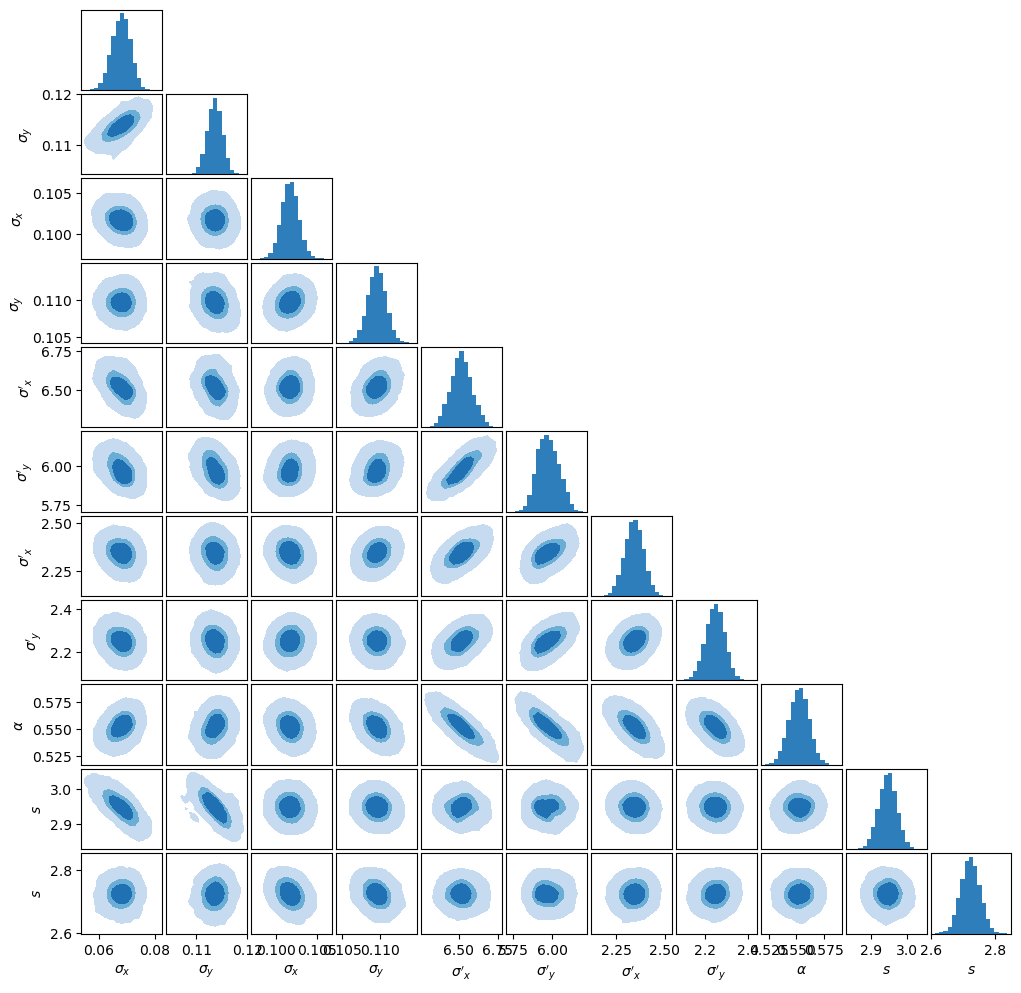

In [60]:
dims = [1,2,3,4,5,6,7,8,9,10, 11]
names = labels[dims]
levels = [0.0001, 0.65, 0.9, 0.95,  1,]
# levels = [0.001, 0.65, 0.95, 1,]
figsize = (12,12)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

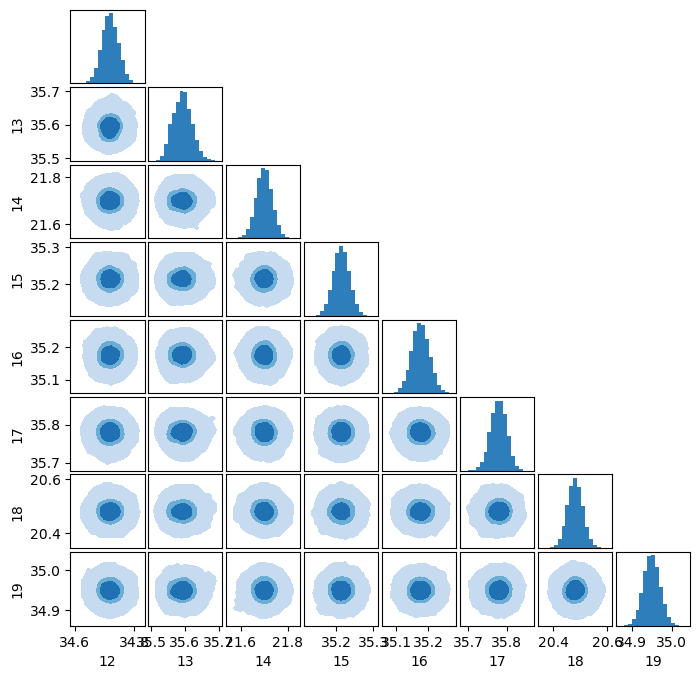

In [61]:
dims = 12:19
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.01, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

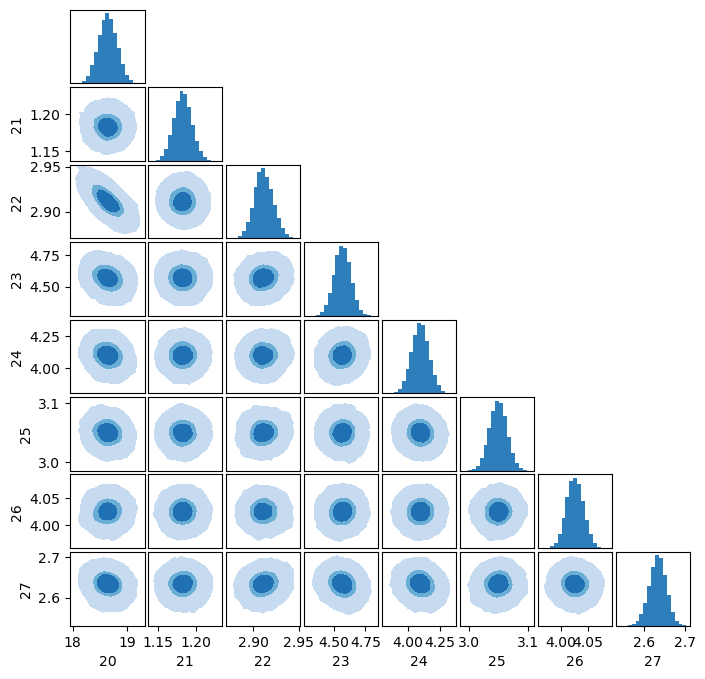

In [62]:
dims = 20:27
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.01, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

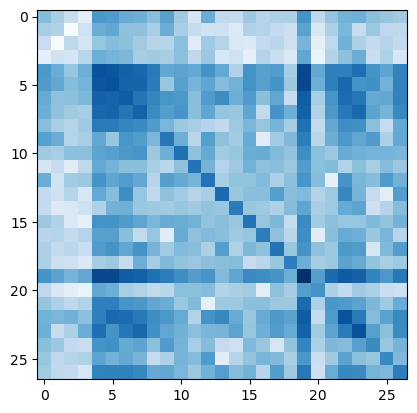

PyObject <matplotlib.image.AxesImage object at 0x7fd299e43d60>

In [63]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

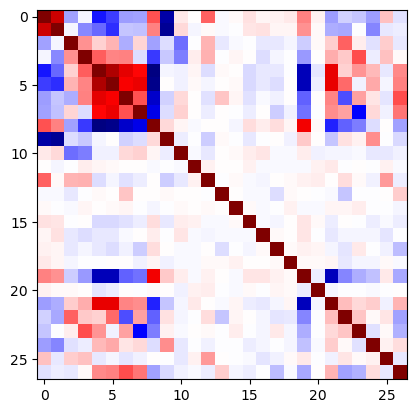

PyObject <matplotlib.image.AxesImage object at 0x7fd29a50fb50>

In [64]:
dt_reg = flatview(unshaped.(samples.v)) ./ std(flatview(unshaped.(samples.v)), dims=2)
dt_reg = dt_reg .- mean(dt_reg, dims=2)
dt_reg = cov(dt_reg')
max = maximum(abs.(dt_reg))

plt.imshow(dt_reg, cmap="seismic", vmin=-max, vmax=max)

In [65]:
if fname[1:2] == "hc"
    
    conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2") 

    global conv_matrices = (
        cam_1 = conv_mat["cam_1"],
        cam_2 = conv_mat["cam_2"],
        cam_3 = conv_mat["cam_3"],
        cam_4 = conv_mat["cam_4"], 
    ) 

    images = load("../../data/experiment/dataset_2/m2/images-satur.jld2")
    event_number = parse(Int64, fname[4:end-5])

    global event = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );
    
    images = load("../../data/experiment/dataset_2/m2/images.jld2")

    global event_nt = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );
end

In [66]:
if fname[1:2] == "lc"
    @show "true"
    conv_mat = load("../../data/experiment/dataset_2/m1/conv-matrix-upd-2.jld2") 

    global conv_matrices = (
        cam_1 = conv_mat["cam_1"],
        cam_2 = conv_mat["cam_2"],
        cam_3 = conv_mat["cam_3"],
        cam_4 = conv_mat["cam_4"], 
    ) 

    images = load("../../data/experiment/dataset_2/m1/images-satur.jld2")
    event_number = parse(Int64, fname[4:end-5])

    global event = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    )
    
    images = load("../../data/experiment/dataset_2/m1/images.jld2")

    global event_nt = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );

end

"true" = "true"


(cam_1 = [6.0 0.0 … 0.0 27.0; 0.0 0.0 … 1.0 0.0; … ; 0.0 0.0 … 41.0 2.0; 152.0 0.0 … 3.0 0.0], cam_2 = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 73.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], cam_3 = [176.0 206.0 … 0.0 0.0; 0.0 60.0 … 16.0 9.0; … ; 71.0 141.0 … 3.0 0.0; 21.0 179.0 … 26.0 71.0], cam_4 = [19.0 17.0 … 20.0 13.0; 13.0 14.0 … 21.0 15.0; … ; 19.0 21.0 … 22.0 15.0; 14.0 15.0 … 18.0 13.0], population = 9.257599830627441)

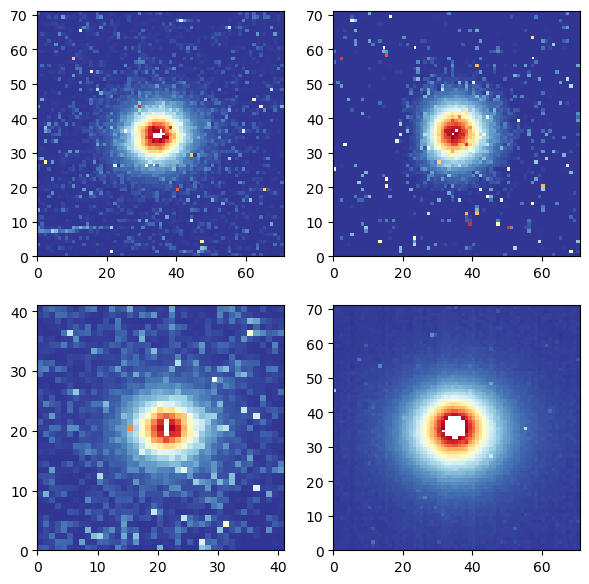

PyObject <matplotlib.collections.QuadMesh object at 0x7fd2b3b08160>

In [67]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

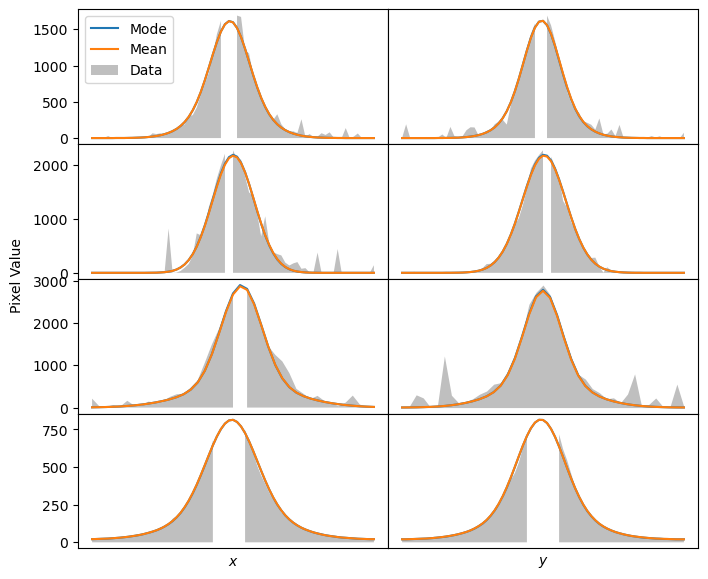

PyObject Text(0.04, 0.5, 'Pixel Value')

In [68]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_crossections(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

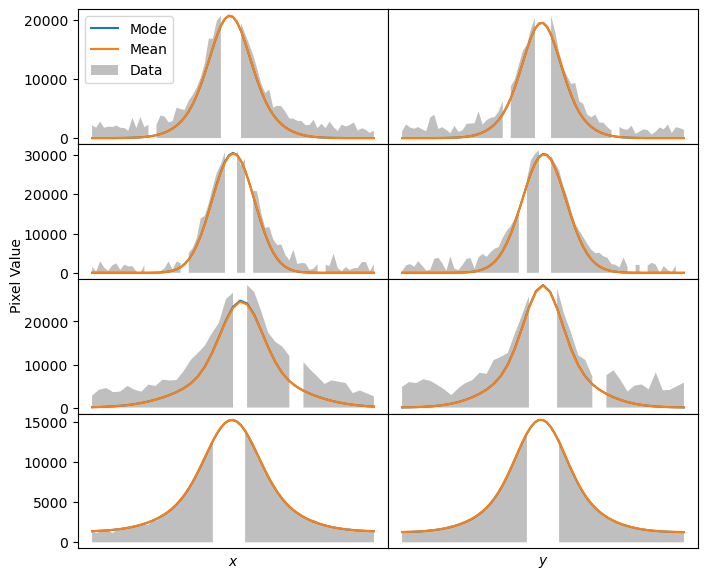

PyObject Text(0.04, 0.5, 'Pixel Value')

In [69]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_integral(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

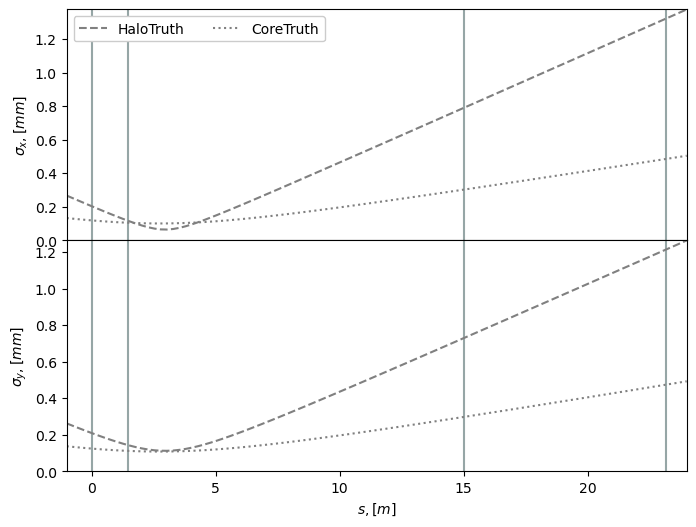

PyObject Text(0.5, 26.28125, '$s, [m]$')

In [70]:
params_array = [mode(samples)[1],]
colors_array = ["gray",]
labels_array = ["Truth", ]

plot_envelop_trajectory(params_array,  labels = labels_array, colors=colors_array)

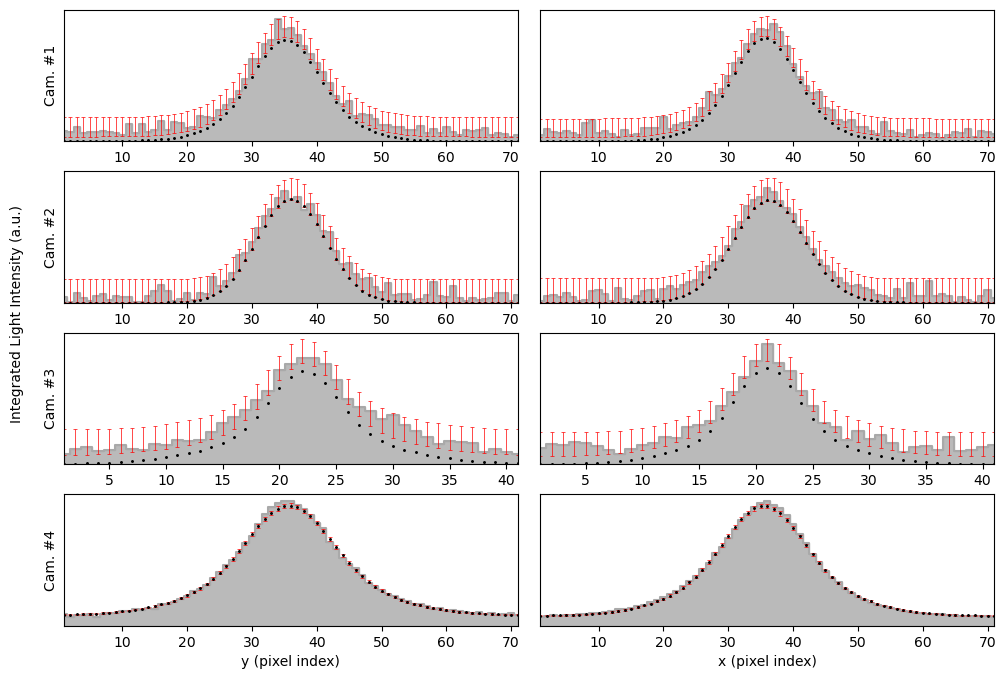

PyObject Text(0.08, 0.5, 'Integrated Light Intensity (a.u.)')

In [71]:
plot_projections(conv_matrices, event_nt, event_nt, params_array[1], isnontr = true)

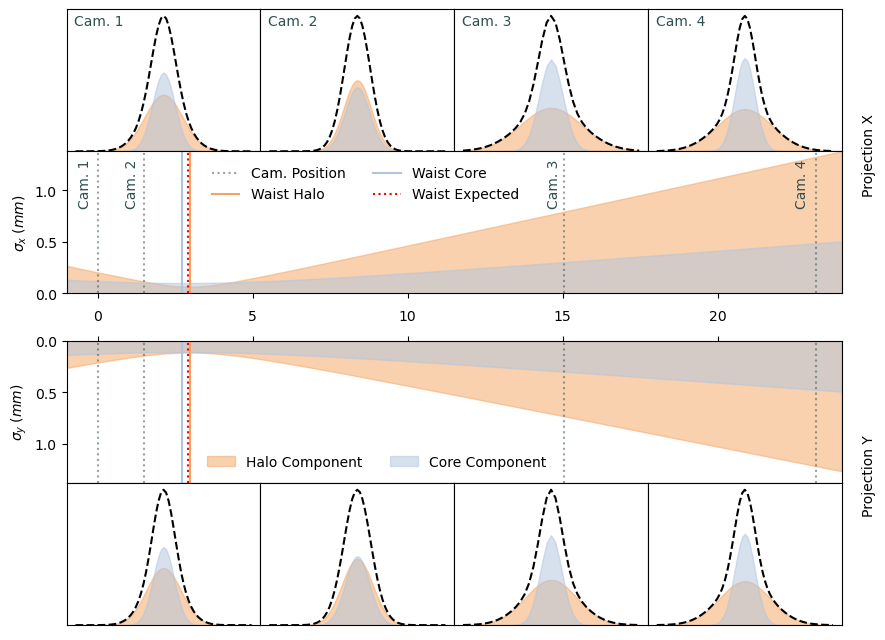

(0.0, 0.07019910399533627)

In [72]:
plot_signal_envelope(params_array[1])